# Practical Linear Algebra for Data Science  
From Core Concepts to Applications Using Python
(c) Mike X Cohen

Code excersises has been resolved with the help   (code examples, exercises, etc.) is available for
at https://github.com/mikexcohen/LinAlg4DataScience.

## GLOSSARY

**Vector** 
- is an arrow in space with a specific direction and length, often representing a piece of data.
- the purpose of the vector is to visually represent a piece of data
  
  <img src="./images/fig_4-1-vector.png" width="300" />
  
**Vectot dimensionality**  
- The number of elements in vector

**Norm, Magnitude**
- Geometric length of a vector

**Unit-norm**
- Gemetric length of 1
- $ \hat{v} $

**Determinant**
- Determinant describe how much a sampled area in a vector space changes in scale with linear transformations. This can provide helpful information about the transformation.
- Determinant of zero meaning a linear dependency exists
**Types of Matrices**
- Square matrix - has an equal number of rows and columns
- Identity matrix= All 0 except diagonal of 1
- Inverse matrix - matrix that undo the transofrmations of other matrix being done
- Diagonal matrix - similar to identity matrix, exept diagonal is formed by any number
- Triangular matrix - similar to identity except non zero values filling top triangle above diagonal
- Sparse matrix- formed mostly by zeros except few values

**Vectors set**
- $S,V = \{v_1,....v_n\}$ a collection of vectors

**Linear weighted combination, Linear mixture, weightd combination**
- a way of mixing information from multiple variables. Means simply vector multiplication or adition
  $w = \lambda_1 v_1 + \lambda_2 v_2 + ... + \lambda_n v_n$

**Regressor**
- predicted variable

**Coefficient**
- scalar

**Linear dependecy**
- if at least one vector in a set can be expressed as a linear weighted combination of other vectors in that set
-  $0 = \lambda_1 v_1 + \lambda_2 v_2 + ... + \lambda_n v_n$ - if true then linear dependend

**Span**
- Combination of all possible linear weighte combinations of a set of vectors. Think span of it as a verb. Span is a mechanism to create a subspace

**Vector subspace**
- created from all possible linear combinations of a set of vectors. Think  of subspace as a Noun

**Basis**
- A basis is a ruler for measuring a space. A vector set can be a basis for a sunspace if it $1$ spans that subspace sn $2$ is linearly indepenededn. *A mojor goal in data sciene is to discover the best basis set to describe datasets or to solve problems*

**Filtering**
- Filtering is essentially a feature -detection method, wherby a template called a kernel (in the parlance of filtering) is matched against portions of a time series signal, and the resulkt of filtering is another time series that indicates how much the characteristics of the signal match the characteristic of the kernel. The mechanism of filtering is to compute the dot product between the kernel and the time series signal

**Convolution**
- compute the dot product between the kernel and a short snippet of the data of the same length as the kernel. This produces one time point in the filtered signal, and then the kernel is moved one time step to the right to compute the dot product with a different (overlapping) signal segment

<img src="./images/conv.png" width="150" />

## SETUP

### Imports

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import plotly.graph_objects as go
import plotly.io as pio
import time
pio.renderers.default = 'notebook'

### Global Settings

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14})

### Functions

## PROBLEMS

### Chapter 2

#### 2-1 Vector Addition

<function matplotlib.pyplot.show(close=None, block=None)>

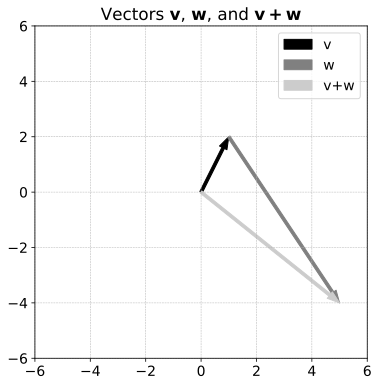

In [3]:
v= np.array([1,2])
w= np.array([4,-6])

vPlusw= v+w

plt.figure(figsize=(6,6))

a1= plt.arrow(
    0,0,
    v[0],v[1],
    head_width=.3,
    width=.1,
    color='k',
    length_includes_head=True
)
a2= plt.arrow(
    v[0],v[1],
    w[0],w[1],
    head_width=.3,
    width=.1,
    color=[.5,.5,.5],
    length_includes_head=True
)
a3= plt.arrow(
    0,0,
    vPlusw[0],vPlusw[1],
    head_width=.3,
    width=.1,
    color=[.8,.8,.8],
    length_includes_head=True
)

plt.grid(linestyle='--', linewidth=.5)
plt.axis('square')
plt.axis([-6,6,-6,6])
plt.legend([a1,a2,a3],['v','w','v+w'])
plt.title('Vectors $\mathbf{v}$, $\mathbf{w}$, and $\mathbf{v+w}$')
plt.show

**SUMMARY**

Vector addoton is pretty streight forward:  

- Algebraicly  
$
  v + w = \begin{bmatrix} 1 + 4 \\ 2 + (-6) \end{bmatrix} = \begin{bmatrix} 5 \\ -4 \end{bmatrix}
$
- Geometricaly  
put tail of second vector to the head of first and draw line


#### 2-3 Unit Norm vector

Norm is the magnitude or in a geometrical sence it is mean length. Which is the distance from tail to head and it is computed using standard Euclidian distance formula

$
    ||v|| = \sqrt{\sum_{i=1}^{n} v_i^2}
$

Unit vector is the product of reciprocal of the vector norm and vector it self  
$
    \hat{v}= v (\frac{1}{||v||}) = \frac{v}{||v||}
$

In [4]:
def normOfVect(v):
    return np.sqrt(np.sum(v**2))

# Test on unit-norm vector
w1= np.array([0,0,1])
print(normOfVect(w1))

# non unit-norm vector
w2= np.array([1,2,3])
print(normOfVect(w2), np.linalg.norm(w2))

1.0
3.7416573867739413 3.7416573867739413


In [5]:
def createUnitVector(v):    
    mu= np.linalg.norm(v)
    return v / mu

w= np.array([0,1,0])
print(createUnitVector(w))

w= np.array([0,3,0])
print(createUnitVector(w))

w= np.array([13,-5,7])
print(createUnitVector(w))

createUnitVector(np.zeros((4,1)) )

[0. 1. 0.]
[0. 1. 0.]
[ 0.83395039 -0.32075015  0.44905021]


/tmp/ipykernel_468/1160802533.py:3: RuntimeWarning: invalid value encountered in divide
  return v / mu


array([[nan],
       [nan],
       [nan],
       [nan]])

#### 2-4 Scale vector

In [6]:
def createMagVec(v, mag):
    '''
    First calculates vector norm, then multiplies unit vectoe reciprocal on to the magnite.
    This all to create a scaled vector which is lies in same direction as original
    '''
    mu= np.linalg.norm(v)
    return mag * (v / mu)

w= np.array([1,0,0])
mw= createMagVec(w,4)
print(mw)

print(np.linalg.norm(w), np.linalg.norm(mw))

[4. 0. 0.]
1.0 4.0


#### 2-5 Transposing a row vector into a column vector

A matrix has rows(i) and columns(j) therfore each element in matrix has a row,columns index [i,j]. The transpose (T) operation is simply swaps i,j indices:  
$
m^T_{i,j} = m_{j,i}
$

In [11]:
row_v= np.array([[1,2,3]])
col_v= np.zeros((3,1))
col_vT= np.zeros((3,1))

for i in range(row_v.shape[1]):
    col_vT[i,0] = row_v[0,i]

print(f'Row vector:\n {row_v}')
print(f'Col vector:\n {col_v}')
print(f'Transposed vector:\n {col_vT}')

Row vector:
 [[1 2 3]]
Col vector:
 [[0.]
 [0.]
 [0.]]
Transposed vector:
 [[1.]
 [2.]
 [3.]]


#### 2-6 Compute vecvor's squred norm by dot product



**Math. Formula for the squared Euclidean norm:**
$
\|\mathbf{v}\|^2 = \sum_{i=1}^n v_i^2
$

and here is the formula for dot product of vector by it self  
$
\mathbf{v} \cdot \mathbf{v} = \sum_{i=1}^n v_i v_i = \sum_{i=1}^n v_i^2
$

**Geometric formula for squared norm**  
$
\mathbf{v} \cdot \mathbf{u} = \|\mathbf{v}\| \|\mathbf{u}\| \cos \theta
$  

thus when 2 vectors are equal  
$
\mathbf{v} \cdot \mathbf{v} = \|\mathbf{v}\| \|\mathbf{v}\| \cdot 1 = \|\mathbf{v}\|^2
$

In [13]:
random_v= np.random.rand(5)

# squared morm as a dot product with it self
norm_sqr1= np.dot(random_v, random_v)
norm_sqr2= normOfVect(random_v)**2
norm_sqr3= random_v @ random_v

print(f'norm_sqr1:{norm_sqr1}')
print(f'norm_sqr2:{norm_sqr2}')
print(f'norm_sqr3:{norm_sqr3}')

norm_sqr1:2.0338040757008655
norm_sqr2:2.033804075700865
norm_sqr3:2.0338040757008655


#### 2-7 Commutatuve property of a vectors dot product

$
\mathbf{a}^T \mathbf{b} = \mathbf{b}^T \mathbf{a}
$

In [19]:
# Vector dimensionality
v_dim=11

a= np.random.rand(v_dim,1)
b= np.random.rand(v_dim,1)

aTb= np.sum(a * b)
bTa= b.T @ a

print(f'aTb - bTa={aTb-bTa}')

aTb - bTa=[[0.]]


#### 2-8 Code that repeates

<img src="./images/fig_2-6.png" width="150" />

The goal is to find the point on a that is as close as possible to the head of b
**Algorythm**
1. Find scale factor $\beta$ for vector 'a' such that lenght of $\beta \text{a} = \text{b}$. The point $\beta$ is othogonal to the vector b. Another words:  
$\text{a}*(\text{b}-\beta\text{b})=0$  
$\text{a}*\text{b} -\beta (\text{a}*\text{a})=0$  
$\beta(\text{a}*\text{a}) = \text{a}*\text{b} | / (\text{a}*\text{a})$  
$\beta=\frac{\text{a}*\text{b}}{\text{a}*\text{a}}$

2. Compute projection point $\beta$

In [28]:
vec_a= np.array([1,2])
vec_b= np.array([1.5,.5])

# compute beta
beta_scalar= (vec_a @ vec_b) / (vec_a @ vec_a)

# compute projection point
projection_point = (vec_b - (beta_scalar*vec_a))


#### 2-9 Orthogonal vector decomposition
<img src="./images/fig_2-7.png" width="200" />
Orthogonal vector decomposition is the process of breaking a vector into two components:  

- $t \parallel r $ t parallel to a given vector 'r' (or subspace). The paralel vector is any scaled version of vector r
- $t \perp r$ perpendicular (orthogonal) to the same vector 'r' (or subspace).

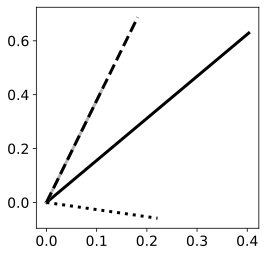

In [43]:
vec_t= np.random.rand(2)
vec_r= np.random.rand(2)

t_parallel_r= vec_r * ((vec_t @ vec_r) / (vec_r @ vec_r))
t_perpend_r = vec_t - t_parallel_r

plt.figure(figsize=(4,4));

# Main vectors
plt.plot([0,vec_t[0]],[0,vec_t[1]], color='k', linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,vec_r[0]],[0,vec_r[1]], color=[.7,.7,.7], linewidth=3,label=r'$\mathbf{r}$')

# Decomposed vectors
plt.plot([0,t_parallel_r[0]],[0,t_parallel_r[1]], 'k--', linewidth=3,label=r'$\mathbf{t}$')
plt.plot([0,t_perpend_r[0]],[0,t_perpend_r[1]], 'k:', linewidth=3,label=r'$\mathbf{t}$')


#### 2-10 Made up bug

In [44]:
t_paralle_r= vec_r * ((vec_t @ vec_r) / (vec_t @ vec_t))

### Chapter 3

#### 3-1 Linear weighted combinantion

In [48]:
# Scalars
lambda1= 1
lambda2= 2
lambda3= -3

# Vectors
v1= np.array([4,5,1])
v2= np.array([-4,0,-4])
v3= np.array([1,3,2])

# Linear weighted combination
lwc = lambda1*v1 + lambda2*v2 + lambda3*v3

print(lwc)

# Organize scalars list
scalars= [lambda1, lambda2, lambda3]
vectors= [v1, v2, v3]

# Linear weighte combination via zip
for s,v in zip(scalars, vectors):
    linCombo += s*v
print(linCombo)

[ -7  -4 -13]
[ -7.  -4. -13.]


#### 3-3 Draw a random points in subspace

Text(-4.5, 4.5, 'A)')

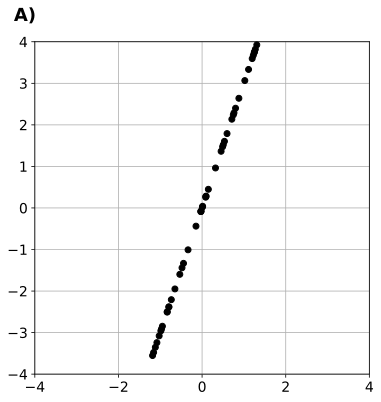

In [67]:
# The vector set containing just one vector
A= np.array([1,3])

# x-axix range
xlim= [-4,4]

# random scalars from xlim space
scalars= np.random.uniform(low=xlim[0], high=xlim[1], size=100)

plt.figure(figsize=(6,6))
for s in scalars:
    # crete point p
    p= A*s
    plt.plot(p[0],p[1],'ko')

plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.text(-4.5, 4.5, 'A)', fontweight='bold', fontsize=18)



In [ ]:

pio.renderers.default = 'notebook'
v1= np.array([3,5,1])
v2= np.array([0,2,2])
trDPoints= np.zeros((100,3))
scalars= np.random.uniform(low=xlim[0], high=xlim[1], size=(100,2))
for i in range(len(scalars)):
    trDPoints[i,:]= v1*scalars[i,0] + v2*scalars[i,1]

fig=go.Figure(data=[go.Scatter3d(x=trDPoints[:,0], 
                                 y=trDPoints[:,1], 
                                 z=trDPoints[:,2], 
                                 mode='markers', 
                                 marker=dict(size=6,color='black') )]);
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plt.savefig('Figure_03_07b.png',dpi=300)
fig.show()

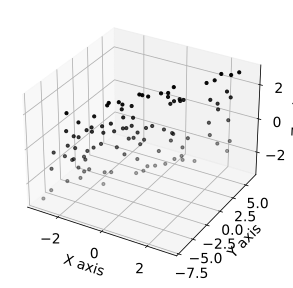

In [85]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определяем символы
s1, s2 = sp.symbols('s1 s2')

# Векторы
v1 = sp.Matrix([3, 5, 1])
v2 = sp.Matrix([0, 2, 2])

# Линейная комбинация
point = s1 * v1 + s2 * v2

# Численные значения для границ
xlim = [-1, 1]

# Генерация случайных скаляров
scalars = np.random.uniform(low=xlim[0], high=xlim[1], size=(100, 2))

# Вычисление точек в численном виде
trDPoints = []
for s1_val, s2_val in scalars:
    numeric_point = point.subs({s1: s1_val, s2: s2_val})  # Подстановка значений
    trDPoints.append([float(numeric_point[0]), float(numeric_point[1]), float(numeric_point[2])])

# Конвертация в numpy-массив
trDPoints = np.array(trDPoints)

# Построение 3D-графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trDPoints[:, 0], trDPoints[:, 1], trDPoints[:, 2], c='black', s=10)

# Настройка осей
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()


### Chapter 4

#### 4-1 Compute Pearson and Cos corelations

1. Cosone Similarity  
$
\cos(\theta_{x,y}) = \frac{\alpha}{\|x\| \|y\|}
$

Where:
- $\alpha$: The **dot product** of the vectors  x and y.
- $ \|x\| = \sqrt{\sum_{i=1}^n x_i^2}$: The **magnitude** (Euclidean norm) of vector x.
- $ \|y\| = \sqrt{\sum_{i=1}^n y_i^2}$: The **magnitude** (Euclidean norm) of vector y.

**Interpretation**
- $ \cos(\theta_{x,y})$ = 1:  Perfect alignment (same direction).
- $ \cos(\theta_{x,y})$ = 0:  Orthogonal (no similarity).
- $ \cos(\theta_{x,y})$ = -1: Perfectly opposite directions

2. Pearson Correlation Coeffisient  
$
\rho = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$

Where:
- $x_i, y_i$: Individual data points of variables x  and y.
- $\bar{x}, \bar{y}$: Mean values of x and y.

**Linear Algebra Notation**

$
\rho = \frac{\tilde{x}^T \tilde{y}}{\|\tilde{x}\| \|\tilde{y}\|}
$
Where:
- $\tilde{x}^T \tilde{y}$: The **dot product** of the mean-centered vectors $\tilde{x}$ and $\tilde{y}$.
- $\|\tilde{x}\|, \|\tilde{y}\|$: The Euclidean norms of the mean-centered vectors.



In [98]:
def compute_cos_and_pearson_cor_coefs(x,y):
    # Compute cosine similarity value
    csv_alpha= np.dot(x,y)
    csv_denominator= np.linalg.norm(x) * np.linalg.norm(y)
    csv= csv_alpha / csv_denominator

    # Compute Pearson Corelation coeficient
    x_centered= x - np.mean(x)
    y_centered= y - np.mean(y)
    pcc_numerator= np.dot(x_centered,y_centered)
    pcc_denominator= np.linalg.norm(x_centered) * np.linalg.norm(y_centered)
    pcc= pcc_numerator / pcc_denominator

    return (csv, pcc)

a= np.random.randn(15)
b= np.random.randn(15)

res= compute_cos_and_pearson_cor_coefs(a,b)
print(f'Cos:{res[0]} Pearson:{res[1]}, NumPy:{np.corrcoef(a,b)[0,1]}')

Cos:-0.3867016167101869 Pearson:-0.3595937797103908, NumPy:-0.35959377971039075


#### 4-2

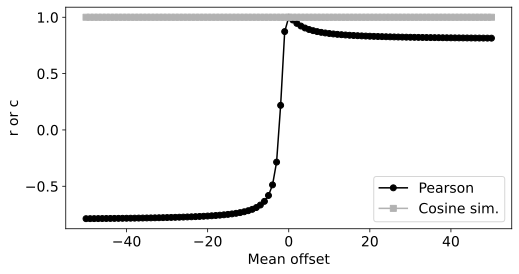

In [104]:
a= np.arange(4,dtype='float32')
offsets= np.arange(-50,51)

results= np.zeros((len(offsets),2))

for i in range(len(offsets)):
    results[i,:]= compute_cos_and_pearson_cor_coefs(a, a+offsets[i])

plt.figure(figsize=(8,4))
h=plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.show()


Pearson Correlation (PCC):
- Sensitive to differences in means (i.e., offsets). It captures the relative positioning of the values after mean-centering.
- Correlation decreases as the offset increases since centering removes the shared pattern.

Cosine Similarity:
- Insensitive to offsets. It only considers the direction of vectors, ignoring mean differences.
- It stays constant at 1.0 because the angular similarity between a and a + offset does not change after normalization.

#### 4-3 Source code

In [106]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None, axis=0):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability 

#### 4-4 Performance check

In [110]:
# a bare bones Pearson corr function
def compute_pearson_cor_coef(x,y):
    # Compute Pearson Corelation coeficient
    x_centered= x - np.mean(x)
    y_centered= y - np.mean(y)
    pcc_numerator= np.dot(x_centered,y_centered)
    pcc_denominator= np.linalg.norm(x_centered) * np.linalg.norm(y_centered)
    
    return pcc_numerator / pcc_denominator

numIters= 1000
varLength= 500

# clock custom-written func
tic= time.time()
for i in range(numIters):
    x= np.random.randn(varLength,2)
    compute_pearson_cor_coef(x[:,0],x[:,1])
t1= time.time() - tic

# clock numpy built-in func
tic= time.time()
for i in range(numIters):
    x=np.random.randn(varLength,2)
    pearsonr(x[:,0], x[:,1])
t2= time.time() - tic

print(f'Custom func speed:{t1 * 1000:.2f} ms')
print(f'Built-in func speed:{t2 * 1000:.2f} ms')

Custom func speed:34.09 ms
Built-in func speed:-1303.91 ms


#### 4-5 Edge detection

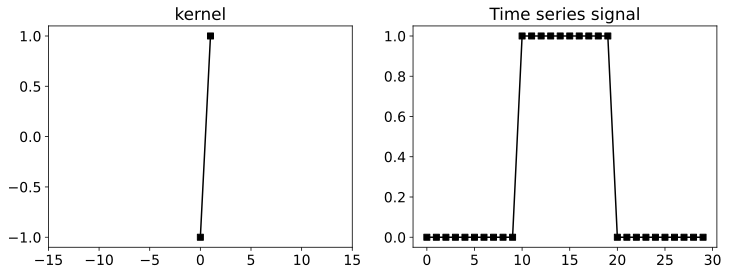

In [111]:
kernel= np.array([-1,1])

signal= np.zeros(30)
signal[10:20]= 1

_, axs= plt.subplots(1,2, figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')
plt.show()

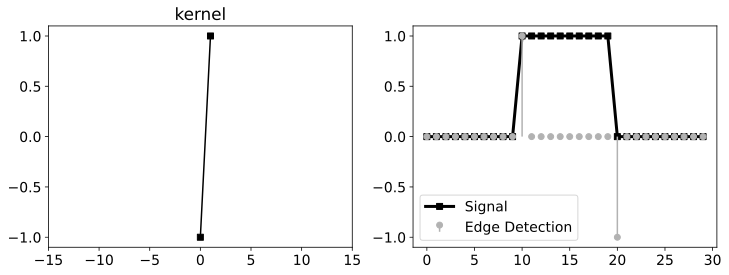

In [116]:
# init feature map
featureMap= np.zeros(len(signal))

# loop over the signal and do templeate matching (via dot prod)
for t in range(1, len(signal) -1):
    featureMap[t]= np.dot(kernel, signal[t-1:t+1])

_, axs= plt.subplots(1,2, figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal, 'ks-', label='Signal', linewidth=3)
markers,stemlines,_= axs[1].stem(range(len(featureMap)), featureMap, basefmt=' ',linefmt='', markerfmt='o', label='Edge Detection')

plt.setp(stemlines, 'color',[.7,.7,.7])
plt.setp(markers, 'color', [.7,.7,.7])
axs[1].legend()
plt.show()

#### 4-6 low-pass filtering

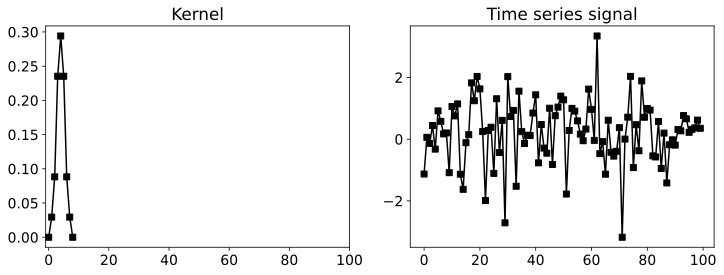

In [120]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.show()

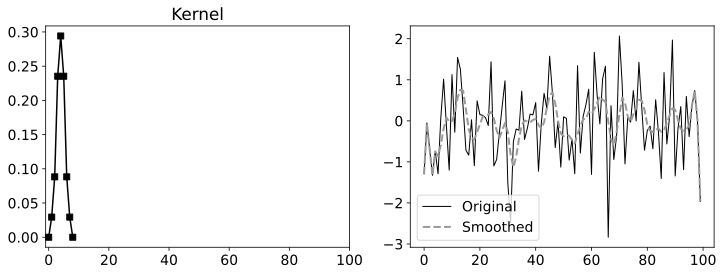

In [119]:
# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2

# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()


plt.show()

#### 4-7 High-pass filter

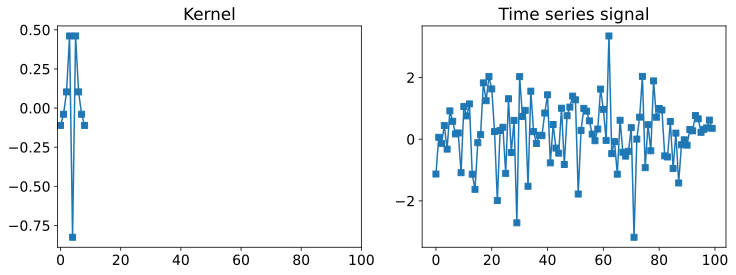

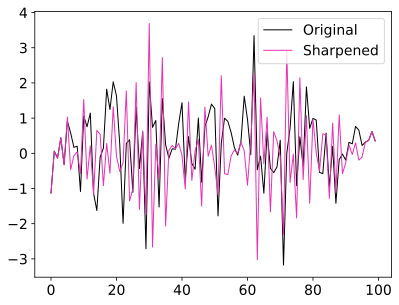

In [121]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()



# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

#### 4-8 k-Means

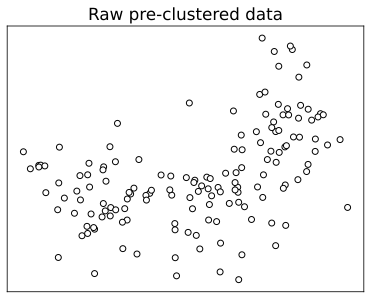

In [126]:
# NOTE Max tiy understood this code well by 11-23-2024
nPerCluster= 50

# blur around centroid
blur=1

# XY Centroid locayions
A=[1,1]
B=[-3,1]
C=[3,3]

# create three clusters (A, B, C) centered at specific 2D locations with Gaussian noise (blur) around the centroids.
a= [ A[0] + np.random.randn(nPerCluster) * blur, A[1] + np.random.randn(nPerCluster) * blur]
b= [ B[0] + np.random.randn(nPerCluster) * blur, B[1] + np.random.randn(nPerCluster) * blur]
c= [ C[0] + np.random.randn(nPerCluster) * blur, C[1] + np.random.randn(nPerCluster) * blur]

# Combine clusters into a single dataset data, where each row represents a 2D point.
data= np.transpose( np.concatenate((a,b,c), axis=1))

# plot data
plt.plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
plt.title('Raw pre-clustered data')
plt.xticks([])
plt.yticks([])

plt.show()

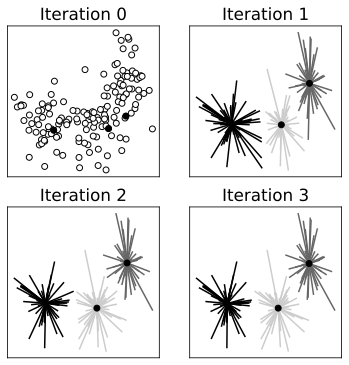

In [131]:
# Initrandom cluster centroids
k=3

# Random initial centroids. Select by sampling k random points from the dataset:
rdix=np.random.choice(range(len(data)),k,replace=False)
centroids= data[rdix,:]

# setup the figure
fig, axs= plt.subplots(2,2, figsize=(6,6))
axs= axs.flatten()
lineColors= [[0,0,0],[.4,.4,.4],[.8,.8,.8]] #rbm

# plot the data with initial random cluster ccentroids
axs[0].plot(data[:,0], data[:,1], 'ko', markerfacecolor='w')
axs[0].plot(centroids[:,0], centroids[:,1], 'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])

# loop over iterations
for iteri in range(3):
    # 1. Compute distances.
    #    The dists matrix is of shape (number of data points, number of clusters) (i.e., dists.shape == (n, k)).
    dists= np.zeros((data.shape[0],k))

    for ci in range(k):
        # For each data point, compute the squared Euclidean distance to all centroids. 
        #This results in a (number of points x k) distance matrix.       
        dists[:,ci]= np.sum((data - centroids[ci,:])**2, axis=1)

    # 2. assign to group based on minimum diisinstance
    #    Assign each point to the cluster corresponding to the nearest centroid (smallest distance).
    groupidx= np.argmin(dists, axis=1)

    # 3. recompite centers
    #    For each cluster, update the centroid as the mean of all points assigned to it.
    for ki in range(k):
        centroids[ki,:]= [np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1])]

    # plot datapoints
    for i in range(len(data)):
        axs[iteri + 1].plot([data[i,0], centroids[groupidx[i],0]], [data[i,1], centroids[groupidx[i],1]], color=lineColors[groupidx[i]])

    axs[iteri+1].plot(centroids[:,0], centroids[:,1], 'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])

plt.show()